In [592]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import subprocess
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

#df = pd.read_csv('wine.csv')
#df = pd.read_csv('data2017_2019new.csv')
#df = pd.read_csv('D1719-1853-1106_25.csv')
#df = pd.read_csv('mulsubRFD1719_1trait.csv') #Traitのvariationは4mtestD1719n_KEi_75のallTrait
df = pd.read_csv('3ykids-ECERSimp01.csv')

df.head()

,Trait,item1_1_1_a,item1_1_2_a,item1_1_3_a,item1_1_4_a,item1_3_1_a,item1_3_2_a,item1_3_3_a,item1_3_4_a,item1_3_5_a,...,item35_3_1_a,item35_3_2_a,item35_3_3_a,item35_3_4_a,item35_5_1_a,item35_5_2_a,item35_5_3_a,item35_7_1_a,item35_7_2_a,item35_7_3_a
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
1,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [593]:
df.count()

Trait           605
item1_1_1_a     605
item1_1_2_a     605
item1_1_3_a     605
item1_1_4_a     605
item1_3_1_a     605
item1_3_2_a     605
item1_3_3_a     605
item1_3_4_a     605
item1_3_5_a     605
item1_5_1_a     605
item1_5_2_a     605
item1_5_3_a     605
item1_7_1_a     605
item1_7_2_a     605
item1_7_3_a     605
item2_1_1_a     605
item2_1_2_a     605
item2_1_3_a     605
item2_3_1_a     605
item2_3_2_a     605
item2_3_3_a     605
item2_3_4_a     605
item2_5_1_a     605
item2_5_2_a     605
item2_5_3_a     605
item2_5_4_a     605
item2_7_1_a     605
item2_7_2_a     605
item2_7_3_a     605
item3_1_1_a     605
item3_1_2_a     605
item3_1_3_a     605
item3_1_4_a     605
item3_3_1_a     605
item3_3_2_a     605
item3_3_3_a     605
item3_3_4_a     605
item3_5_1_a     605
item3_5_2_a     605
item3_5_3_a     605
item3_5_4_a     605
item3_7_1_a     605
item3_7_2_a     605
item3_7_3_a     605
item4_1_1_a     605
item4_1_2_a     605
item4_1_3_a     605
item4_3_1_a     605
item4_3_2_a     605


In [594]:
# 分類するクラスの種類と数を確認
df['Trait'].value_counts()
#df['kids_index'].value_counts()

1    453
0    152
Name: Trait, dtype: int64

In [596]:
# 機械学習のモデルを作成するトレーニング用と評価用の2種類に分割する
#train_x = df.drop(['Class'], axis=1) # 説明変数のみにする
#train_y = df['Class'] # 正解クラス
#(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)
#訓練用の説明変数と正解クラス、評価用の説明変数と正解クラスに分割 

# 機械学習のモデルを作成するトレーニング用と評価用の2種類に分割する
train_x = df.drop(['Trait'], axis=1) # 説明変数のみにする
train_y = df['Trait']  # 正解クラス
(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.25, random_state = 42)
#訓練用の説明変数と正解クラス、評価用の説明変数と正解クラスに分割 

#print(train_y)
#print(test_y)

# 機械学習のモデルを作成するトレーニング用と評価用の2種類に分割する
#train_x = df.loc[:,'item1_1_1_a':'item35_7_3_a'] # 説明変数のみにする
#train_y = df['kids_index'] # 正解クラス
#(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)
#訓練用の説明変数と正解クラス、評価用の説明変数と正解クラスに分割

In [597]:
# 識別モデルの構築
random_forest = RandomForestClassifier(max_depth=30, n_estimators=500, random_state=42)
random_forest.fit(train_x, train_y)

print(random_forest.classes_)
print(confusion_matrix(train_y,random_forest.predict(train_x),labels=random_forest.classes_))

# 予測値算出
y_pred = random_forest.predict(test_x)

#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#print('test_y', test_y)
#print('y_pred', y_pred)

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

[0 1]
[[ 26  89]
 [ 14 324]]
TrainAccuracy: 0.7726269315673289
Accuracy: 0.7894736842105263


In [598]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.35      0.45        37
           1       0.82      0.93      0.87       115

    accuracy                           0.79       152
   macro avg       0.72      0.64      0.66       152
weighted avg       0.77      0.79      0.77       152



Text(91.68, 0.5, 'true value')

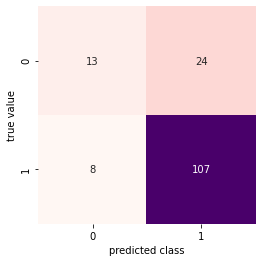

In [599]:
#confusion matrix
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [600]:
#どのデータを、どのクラスに分類したのか。
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [601]:
# ランダムフォレストのパラメータの候補をいくつか決める
parameters = {
    'n_estimators' :[3,5,10,30,50],#作成する決定木の数
    'random_state' :[7,42],
    'max_depth' :[3,5,8,10],#決定木の深さ
    'min_samples_leaf': [2,5,10,20,50],#分岐し終わったノードの最小サンプル数
    'min_samples_split': [2,5,10,20,50]#決定木が分岐する際に必要なサンプル数
}

#グリッドサーチを使う
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=2, #iid=False
                  )

#学習モデルを作成
clf.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20, 50],
                         'n_estimators': [3, 5, 10, 30, 50],
                         'random_state': [7, 42]})

In [602]:
#精度を確認
best_clf = clf.best_estimator_ #ここにベストパラメータの組み合わせが入っています
print('score: {:.2%}'.format(best_clf.score(train_x, train_y)))
print(best_clf)
y_pred = clf.predict(test_x)
print('score: {:.2%}'.format(best_clf.score(test_x, test_y)))

score: 74.61%
RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=3,
                       random_state=42)
score: 75.66%


[0 1]
[[ 26  89]
 [ 14 324]]
Accuracy: 0.756578947368421
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.76      1.00      0.86       115

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.57      0.76      0.65       152



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


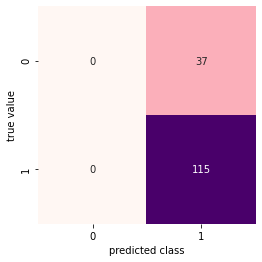

In [603]:
#confusion matrix
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

print(random_forest.classes_)
print(confusion_matrix(train_y,random_forest.predict(train_x),labels=random_forest.classes_))

TrainAccuracy: 0.990990990990991

accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

In [604]:
# 変数の重要度を可視化
importance = pd.DataFrame({ '変数' :train_x.columns, '重要度' :random_forest.feature_importances_})
pd.set_option('display.max_rows', 450)
#print(importance)
importance

,変数,重要度
0,item1_1_1_a,0.000000
1,item1_1_2_a,0.000000
2,item1_1_3_a,0.000000
3,item1_1_4_a,0.000000
4,item1_3_1_a,0.002429
5,item1_3_2_a,0.000000
6,item1_3_3_a,0.000000
7,item1_3_4_a,0.000000
8,item1_3_5_a,0.000000
9,item1_5_1_a,0.000000


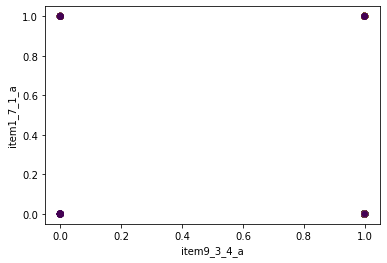

In [13]:
plt.scatter(df['item1_7_1_a'], df['item9_3_4_a'], c = df['Trait'])
plt.ylabel('item1_7_1_a')
plt.xlabel('item9_3_4_a')
plt.show()

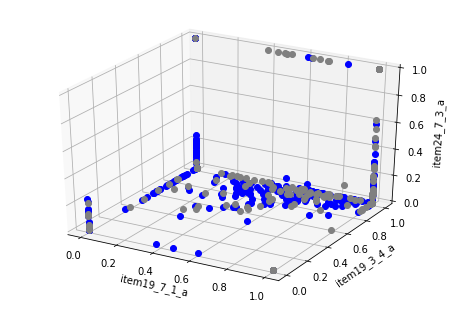

In [26]:
df_1 = df[df['Trait'] == 1]
df_2 = df[df['Trait'] == 2]
df_3 = df[df['Trait'] == 3]
df_4 = df[df['Trait'] == 4]
df_5 = df[df['Trait'] == 5]
df_6 = df[df['Trait'] == 6]
df_7 = df[df['Trait'] == 7]
df_8 = df[df['Trait'] == 8]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("item19_7_1_a")
ax.set_ylabel("item19_3_4_a")
ax.set_zlabel("item24_7_3_a")
ax.plot(df_1['item19_7_1_a'], df_1['item19_3_4_a'],df_1['item24_7_3_a'],marker="o",linestyle='None', c='blue')
ax.plot(df_2['item19_7_1_a'], df_2['item19_3_4_a'],df_2['item24_7_3_a'],marker="o",linestyle='None', c='gray')
ax.plot(df_3['item19_7_1_a'], df_3['item19_3_4_a'],df_3['item24_7_3_a'],marker="o",linestyle='None', c='black')
plt.show()

In [18]:
from sklearn import tree
for i in range(1, 31):
    #tree.export_graphviz(random_forest.estimators_[i-1],'tree' + str(i) + '.dot')
    tree.export_graphviz(random_forest.estimators_[i-1], 'tree.dot')
    subprocess.run("dot -Tpng tree.dot -o tree.png".split())